# KMeans clustering:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv('EastWestAirlines.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [38]:
a=df.drop(['ID#','Award?'],axis=1)
a

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster,cluster1
0,28143,0,1,1,1,174,1,0,0,7000,2,2
1,19244,0,1,1,1,215,2,0,0,6968,2,2
2,41354,0,1,1,1,4123,4,0,0,7034,2,2
3,14776,0,1,1,1,500,1,0,0,6952,2,2
4,97752,0,4,1,1,43300,26,2077,4,6935,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2,2
3995,64385,0,1,1,1,981,5,0,0,1395,2,2
3996,73597,0,3,1,1,25447,8,0,0,1402,2,2
3997,54899,0,1,1,1,500,1,500,1,1401,2,2


In [39]:
feature=a
feature

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster,cluster1
0,28143,0,1,1,1,174,1,0,0,7000,2,2
1,19244,0,1,1,1,215,2,0,0,6968,2,2
2,41354,0,1,1,1,4123,4,0,0,7034,2,2
3,14776,0,1,1,1,500,1,0,0,6952,2,2
4,97752,0,4,1,1,43300,26,2077,4,6935,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2,2
3995,64385,0,1,1,1,981,5,0,0,1395,2,2
3996,73597,0,3,1,1,25447,8,0,0,1402,2,2
3997,54899,0,1,1,1,500,1,500,1,1401,2,2


In [40]:
kmeans=KMeans(n_clusters=4)

In [41]:
cluster=kmeans.fit(feature)
cluster

KMeans(n_clusters=4)

In [42]:
cluster.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
np.unique(cluster.labels_)

array([0, 1, 2, 3])

In [44]:
df['cluster']=cluster.labels_
df['cluster']

0       0
1       0
2       0
3       0
4       1
       ..
3994    0
3995    0
3996    0
3997    0
3998    0
Name: cluster, Length: 3999, dtype: int32

In [45]:
df[df['cluster']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,cluster1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,1,2
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1,2
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1,2
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3926,3949,89222,0,1,1,1,0,0,0,0,1528,0,1,2
3946,3969,139032,0,3,1,1,19565,17,1150,4,1481,0,1,0
3949,3972,170632,0,1,1,1,4650,3,0,0,1480,0,1,0
3961,3984,131125,862,1,1,1,4993,11,50,1,1443,0,1,0


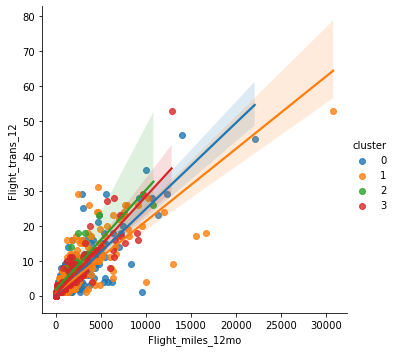

In [46]:
sns.lmplot(data=df,x='Flight_miles_12mo',y='Flight_trans_12',hue='cluster')

In [50]:
cluster.cluster_centers_

array([[ 3.23009849e+05,  3.37248649e+02,  3.14594595e+00,
         1.01621622e+00,  1.00000000e+00,  4.36441189e+04,
         1.85837838e+01,  1.28333514e+03,  3.88108108e+00,
         5.53258378e+03,  6.27027027e-01,  2.00000000e+00],
       [ 3.10070448e+04,  1.01625623e+02,  1.66868327e+00,
         1.01637011e+00,  1.00498221e+00,  1.01091384e+04,
         9.32953737e+00,  2.90204982e+02,  8.83274021e-01,
         3.78557046e+03,  3.23843416e-01,  9.99288256e-01],
       [ 8.42320231e+05,  5.12692308e+02,  3.34615385e+00,
         1.00000000e+00,  1.11538462e+00,  5.77971923e+04,
         2.27307692e+01,  1.84588462e+03,  6.96153846e+00,
         6.46300000e+03,  8.46153846e-01,  3.00000000e+00],
       [ 1.28368880e+05,  2.19861963e+02,  2.94274029e+00,
         1.00920245e+00,  1.03271984e+00,  3.12665358e+04,
         1.65143149e+01,  7.55497955e+02,  2.15950920e+00,
         4.74550102e+03,  4.42740286e-01, -2.10942375e-15]])

In [15]:
silhouette_score(feature,cluster.labels_)

0.5906749471074476

In [16]:
cluster.inertia_

7549630961801.497

# Elbow Method:

In [18]:
inertia=[]
for i in range(1,11):
    kmeans.fit(feature)
    inertia.append(cluster.inertia_)
print(inertia)

[7549630961801.496, 7549630961801.496, 7549630961801.496, 7549630961801.496, 7549630961801.496, 7549630961801.496, 7549630961801.496, 7549630961801.496, 7549558126199.016, 7549630961801.496]


In [20]:
kmeans1=KMeans(n_clusters=3)

In [22]:
cluster1=kmeans1.fit(feature)
cluster1

KMeans(n_clusters=3)

In [23]:
cluster1.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
np.unique(cluster1.labels_)

array([0, 1, 2])

In [25]:
cluster1.inertia_

11794971347620.28

In [26]:
inertia=[]
for i in range(1,21):
    kmeans1.fit(feature)
    inertia.append(cluster1.inertia_)
print(inertia)

[11789818745648.564, 11795139548491.355, 11790841556810.342, 11793599846488.822, 11832923807664.602, 11789108598299.635, 11789332956938.016, 11789152716591.455, 11792330347526.812, 11790024791225.732, 11825165636648.484, 11790495893646.768, 11795139548491.355, 11795139548491.355, 11789332956938.016, 11795159533202.559, 11822413641966.764, 11789108598299.633, 11792330347526.81, 11789152716591.455]


In [27]:
silhouette_score(feature,cluster1.labels_)

0.6450368721320611

# Heirarchical Clustering:

In [48]:
df=pd.read_csv('EastWestAirlines.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [50]:
feature1=df.drop(['ID#','Award?'],axis=1)
feature1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


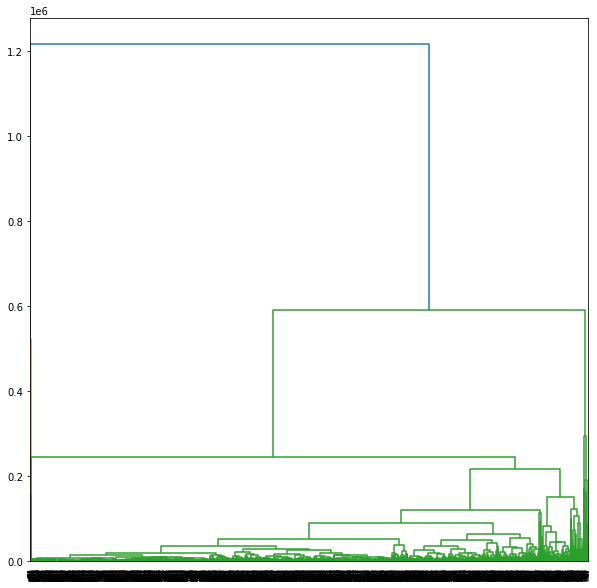

In [53]:
fig=plt.figure(figsize=(10,10))
dendrogram=sch.dendrogram(sch.linkage(feature1,method='average'))

In [55]:
agg=AgglomerativeClustering(n_clusters=5,linkage='single')

In [61]:
p=agg.fit(feature1)
p

AgglomerativeClustering(linkage='single', n_clusters=5)

In [57]:
p.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
np.unique(p.labels_)

array([0, 1, 2, 3, 4], dtype=int64)

In [60]:
silhouette_score(feature1,p.labels_)  #Silhouette score for single linkage with 5 number of clusters is 89% 

0.8927492919174569

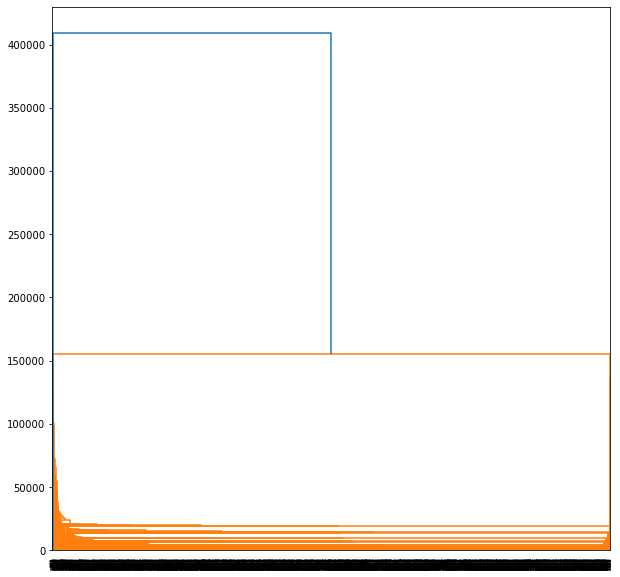

In [62]:
fig=plt.figure(figsize=(10,10))
dendrogram1=sch.dendrogram(sch.linkage(feature1,method='single'))

In [65]:
agg1=AgglomerativeClustering(n_clusters=3,linkage='ward')

In [66]:
p1=agg1.fit(feature1)
p1

AgglomerativeClustering(n_clusters=3)

In [67]:
p1.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [68]:
np.unique(p1.labels_)

array([0, 1, 2], dtype=int64)

In [69]:
silhouette_score(feature1,p1.labels_)  #silhouette score for ward linkage with 3 number of clusters is 65%

0.6495571355884097

In [72]:
agg2=AgglomerativeClustering(n_clusters=7,linkage='complete')

In [73]:
p2=agg2.fit(feature1)
p2

AgglomerativeClustering(linkage='complete', n_clusters=7)

In [74]:
p2.labels_

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [75]:
np.unique(p2.labels_)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [76]:
silhouette_score(feature1,p2.labels_)  #Silhouette score for complete linkage with 7 number of clusters is 65%

0.6484398823291507

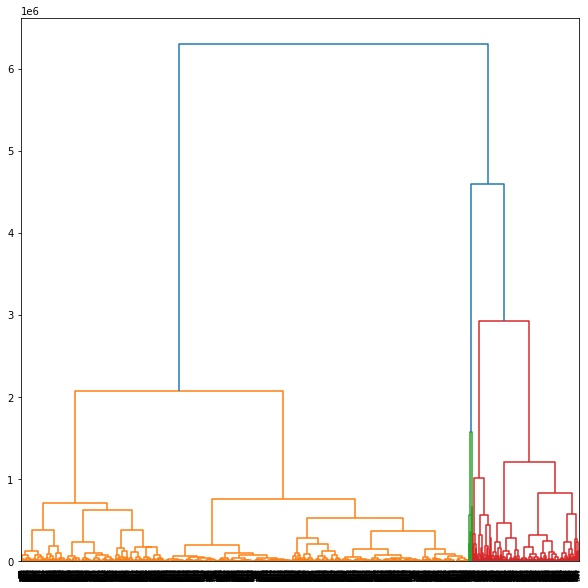

In [79]:
fig=plt.figure(figsize=(10,10))
dendrogram2=sch.dendrogram(sch.linkage(feature1,method='ward'))

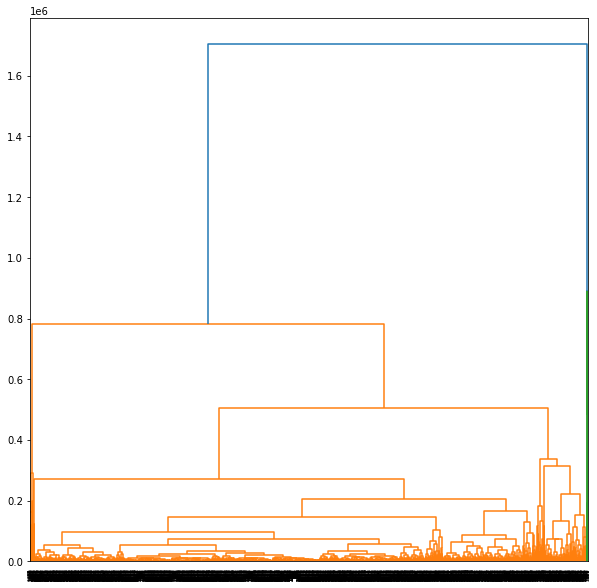

In [80]:
fig=plt.figure(figsize=(10,10))
dendrogram3=sch.dendrogram(sch.linkage(feature1,method='complete'))

# DBSCAN Clustering:

In [81]:
df=pd.read_csv('EastWestAirlines.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [89]:
df1=df.drop(['ID#','Award?'],axis=1)
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
std_sca=StandardScaler()

In [90]:
df_new=pd.DataFrame(std_sca.fit_transform(df1),columns=df1.columns)
df_new

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


In [91]:
dbscan=DBSCAN(eps=0.3,min_samples=4)

In [93]:
q=dbscan.fit(df_new)
q

DBSCAN(eps=0.3, min_samples=4)

In [94]:
q.labels_

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [95]:
np.unique(q.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19], dtype=int64)

In [99]:
silhouette_score(df_new,q.labels_)

-0.41331786765101275

In [105]:
output=[]
eps=[0.1,0.2,0.3,0.4,0.5]
min_nodes=range(1,6)
for ep in eps:
    for mn in min_nodes:
        dbscan=DBSCAN(eps=ep,min_samples=mn)
        dbscan.fit(df_new).labels_
        score=silhouette_score(df_new,dbscan.labels_)
        output.append([ep,mn,score])
print(output)

[[0.1, 1, -0.03238184912367044], [0.1, 2, -0.5048944302985027], [0.1, 3, -0.44972735926754903], [0.1, 4, -0.3815915675409907], [0.1, 5, -0.34936720762023604], [0.2, 1, -0.1712541080640959], [0.2, 2, -0.5057588452266975], [0.2, 3, -0.5319579342758701], [0.2, 4, -0.5259258259023759], [0.2, 5, -0.5263917676089681], [0.3, 1, -0.26235424992545675], [0.3, 2, -0.4604171924326575], [0.3, 3, -0.45980506098264406], [0.3, 4, -0.41331786765101275], [0.3, 5, -0.43604442130069915], [0.4, 1, -0.2779679273361312], [0.4, 2, -0.3802624514518765], [0.4, 3, -0.30761429520447403], [0.4, 4, -0.27248892136126773], [0.4, 5, -0.24563113541349066], [0.5, 1, -0.25903129589657126], [0.5, 2, -0.2589985494976099], [0.5, 3, -0.1900362596306665], [0.5, 4, -0.11486773442536105], [0.5, 5, -0.07406726457859085]]


In [106]:
output=[]
eps=[0.1,0.2,0.4,0.6,0.8,0.9]
min_nodes=range(1,11)
for ep in eps:
    for mn in min_nodes:
        dbscan=DBSCAN(eps=ep,min_samples=mn)
        dbscan.fit(df_new).labels_
        score=silhouette_score(df_new,dbscan.labels_)
        output.append([ep,mn,score])
print(output)

[[0.1, 1, -0.03238184912367044], [0.1, 2, -0.5048944302985027], [0.1, 3, -0.44972735926754903], [0.1, 4, -0.3815915675409907], [0.1, 5, -0.34936720762023604], [0.1, 6, -0.35511797817765045], [0.1, 7, -0.3131816290803298], [0.1, 8, -0.30940928467752904], [0.1, 9, -0.3023803443918507], [0.1, 10, -0.30303357226815986], [0.2, 1, -0.1712541080640959], [0.2, 2, -0.5057588452266975], [0.2, 3, -0.5319579342758701], [0.2, 4, -0.5259258259023759], [0.2, 5, -0.5263917676089681], [0.2, 6, -0.4433193522592333], [0.2, 7, -0.2597117469389673], [0.2, 8, -0.26957219929174675], [0.2, 9, -0.28354991328467855], [0.2, 10, -0.30478550267109317], [0.4, 1, -0.2779679273361312], [0.4, 2, -0.3802624514518765], [0.4, 3, -0.30761429520447403], [0.4, 4, -0.27248892136126773], [0.4, 5, -0.24563113541349066], [0.4, 6, -0.21479901856733463], [0.4, 7, -0.18165600159321543], [0.4, 8, -0.19453065798411726], [0.4, 9, -0.1534998882868494], [0.4, 10, -0.1164358209119204], [0.6, 1, -0.25578512261139047], [0.6, 2, -0.1985038

In [104]:
output=[]
eps=[0.1,0.2,0.3,0.4,0.5]
min_nodes=range(1,11)
for ep in eps:
    for mn in min_nodes:
        labels=DBSCAN(eps=ep,min_samples=mn).fit(df_new).labels_
        score=silhouette_score(df_new,labels)
        output.append([ep,mn,score])
print(output)

[[0.1, 1, -0.03238184912367044], [0.1, 2, -0.5048944302985027], [0.1, 3, -0.44972735926754903], [0.1, 4, -0.3815915675409907], [0.1, 5, -0.34936720762023604], [0.1, 6, -0.35511797817765045], [0.1, 7, -0.3131816290803298], [0.1, 8, -0.30940928467752904], [0.1, 9, -0.3023803443918507], [0.1, 10, -0.30303357226815986], [0.2, 1, -0.1712541080640959], [0.2, 2, -0.5057588452266975], [0.2, 3, -0.5319579342758701], [0.2, 4, -0.5259258259023759], [0.2, 5, -0.5263917676089681], [0.2, 6, -0.4433193522592333], [0.2, 7, -0.2597117469389673], [0.2, 8, -0.26957219929174675], [0.2, 9, -0.28354991328467855], [0.2, 10, -0.30478550267109317], [0.3, 1, -0.26235424992545675], [0.3, 2, -0.4604171924326575], [0.3, 3, -0.45980506098264406], [0.3, 4, -0.41331786765101275], [0.3, 5, -0.43604442130069915], [0.3, 6, -0.4498329480962873], [0.3, 7, -0.33576939238827486], [0.3, 8, -0.2668912066680125], [0.3, 9, -0.26622089503591667], [0.3, 10, -0.28462686238597656], [0.4, 1, -0.2779679273361312], [0.4, 2, -0.3802624